### Модели регрессии

#### Цель работы

Познакомиться с основными приемами работы с моделями регрессии в scikit-learn.

#### Задания для выполнения

1. Загрузите встроенные датасет о ценах на недвижимость в Калифорнии.
2. Постройте модель регрессии для предсказания цены конкретного объекта.
3. Оцените качество построенной модели с помощью визуализации и коэффициента детерминации.
4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

#### 1. Загрузите встроенные датасет о ценах на недвижимость в Калифорнии.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

california_dataset = fetch_california_housing()

print(california_dataset.keys())
print(california_dataset['DESCR'])
print(california_dataset['feature_names'])
print(california_dataset['target_names'])


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

#### 2. Постройте модель регрессии для предсказания цены конкретного объекта.

In [19]:
y = california_dataset.target
X = california_dataset.data

model = LinearRegression()
model.fit(X, y)

LinearRegression()

#### 3. Оцените качество построенной модели с помощью визуализации и коэффициента детерминации.

0.6062326851998051

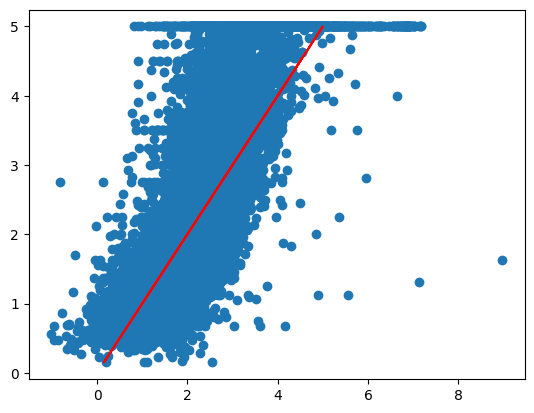

In [20]:
y_pred = model.predict(X)
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

r2_score(y, y_pred)

#### 4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

0.6832976293317465

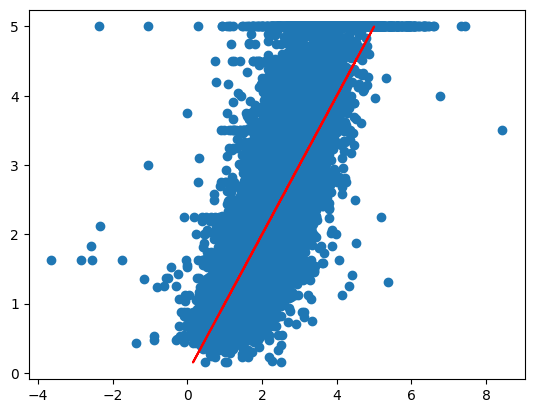

In [21]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X)
polynomial = LinearRegression()
polynomial.fit(X_train_poly, y)
y_pred_poly = polynomial.predict(X_test_poly)
r2_poly = r2_score(y, y_pred_poly)

plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')
r2_poly

#### Задания для самостоятельного выполнения

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [22]:
def train_and_evaluate_models(X, y):
    models = {
        "Линейная регрессия": LinearRegression(),
        "Гребневая регрессия": Ridge(),
        "Лассо регрессия": Lasso(),
        "ElasticNet регрессия": ElasticNet(),
        "Метод опорных векторов (без ядра)": SVR(kernel='linear'),
        "Метод опорных векторов (гауссовое ядро)": SVR(kernel='rbf'),
        "Метод опорных векторов (полиномиальное ядро)": SVR(kernel='poly'),
        "Метод ближайших соседей": KNeighborsRegressor(),
        "Многослойный перцептрон": MLPRegressor(max_iter=1000),
        "Дерево решений": DecisionTreeRegressor(),
        "Случайный лес": RandomForestRegressor(),
        "Беггинг": BaggingRegressor()
    }

    for model_name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        
        # Метрики
        r2 = r2_score(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        
        # Выводим результаты
        print(f"{model_name}:")
        print(f"  R²: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  MSE: {mse:.4f}")
        plt.scatter(y_pred, y)
        plt.plot(y, y, c='r')
        plt.show()
        

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

Линейная регрессия:
  R²: 0.5177
  MAE: 43.2775
  MSE: 2859.6963


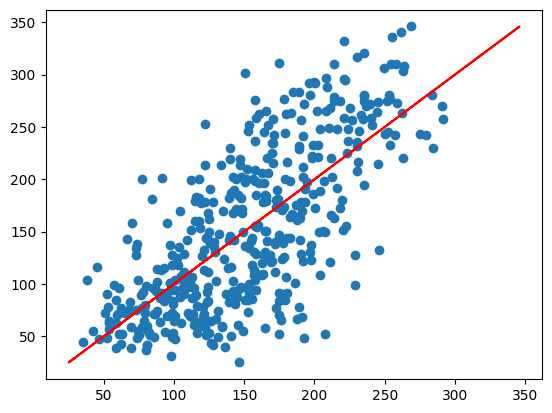

Гребневая регрессия:
  R²: 0.4512
  MAE: 47.6074
  MSE: 3254.1392


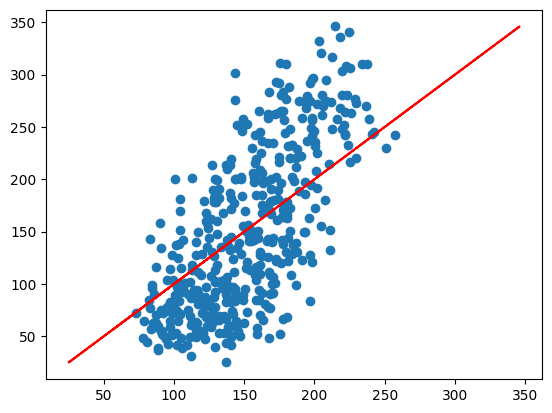

Лассо регрессия:
  R²: 0.3574
  MAE: 52.5449
  MSE: 3810.6701


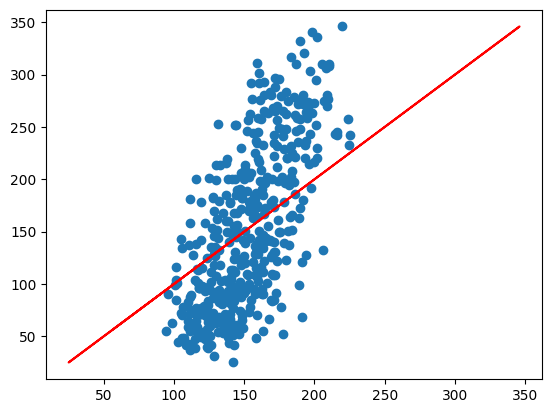

ElasticNet регрессия:
  R²: 0.0088
  MAE: 65.4878
  MSE: 5877.4959


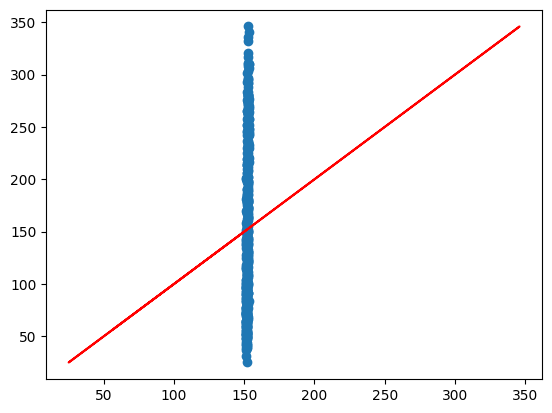

Метод опорных векторов (без ядра):
  R²: 0.0073
  MAE: 64.0936
  MSE: 5886.4533


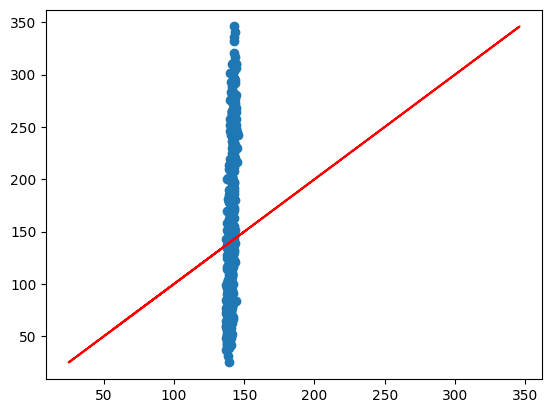

Метод опорных векторов (гауссовое ядро):
  R²: 0.2072
  MAE: 56.8948
  MSE: 4701.3448


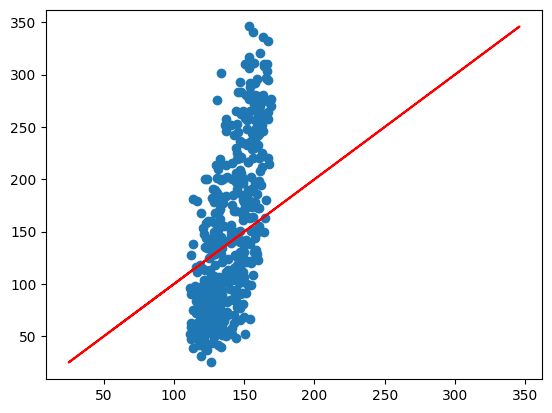

Метод опорных векторов (полиномиальное ядро):
  R²: 0.2926
  MAE: 53.0865
  MSE: 4194.8332


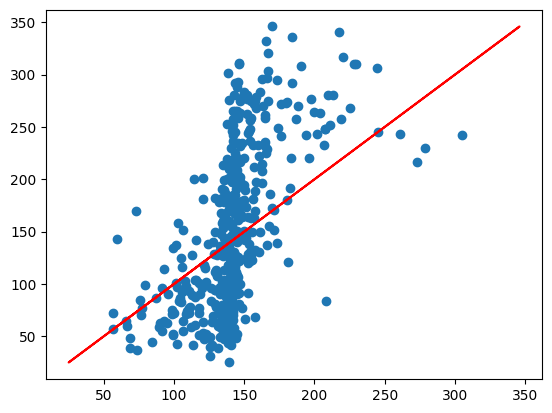

Метод ближайших соседей:
  R²: 0.6050
  MAE: 37.5869
  MSE: 2342.5559


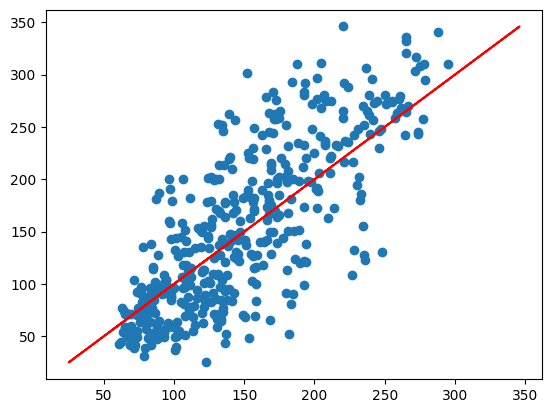

Многослойный перцептрон:
  R²: 0.4658
  MAE: 46.4763
  MSE: 3167.4967


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


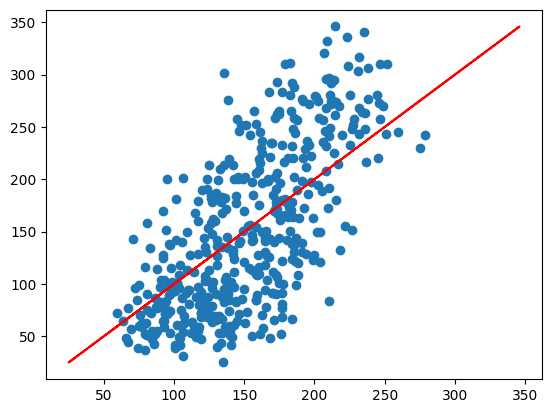

Дерево решений:
  R²: 1.0000
  MAE: 0.0000
  MSE: 0.0000


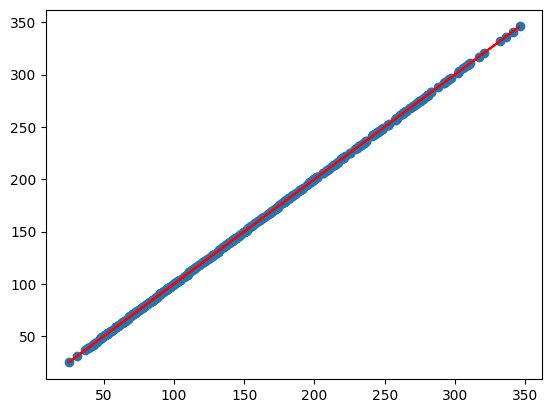

Случайный лес:
  R²: 0.9198
  MAE: 17.6247
  MSE: 475.6344


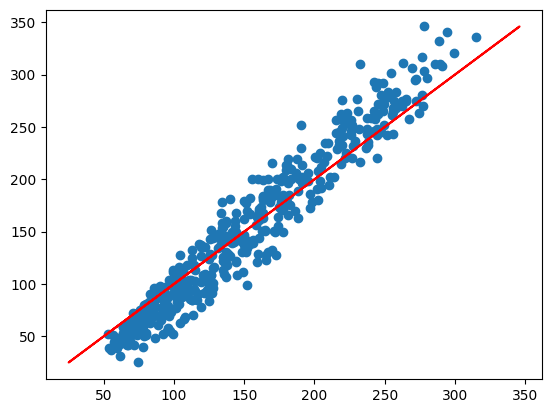

Беггинг:
  R²: 0.9016
  MAE: 17.6416
  MSE: 583.3964


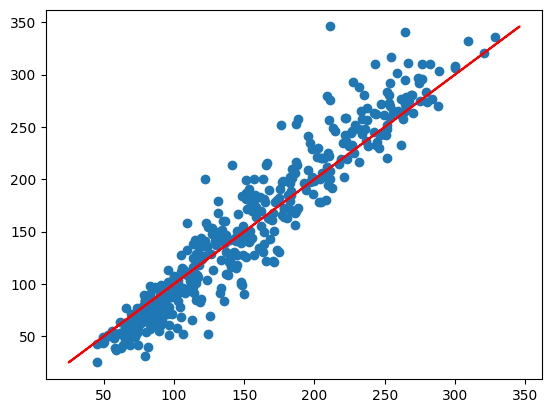

In [23]:
train_and_evaluate_models(X, y)